In [ ]:
"PDI 5 - Histograma"

In [17]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import math

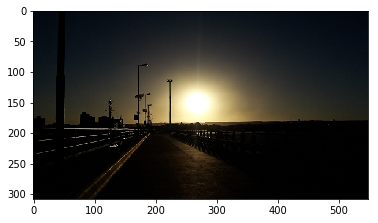

In [71]:
#Cargar imagen
img = cv2.imread(str("img_oscura.png"))           
height, width, channels = img.shape     
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img)

plt.imshow(img1)
plt.show()

In [72]:
#Obtener luminancias
global r, g, b
def luminancias(im):
    lum = []
    for w in range(0, width):
        for h in range(0, height):
            if im == 'img1':
                r, g, b = tuple(img[h][w])
            elif im == 'img2':
                r, g, b = tuple(img2[h][w])
                
            y = 0.299*r + 0.587*g + 0.114*b
            y = y /255
            lum.append(y)
        
    luminancia = np.array(lum)
    return luminancia

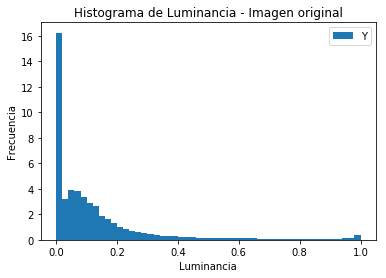

In [48]:
#Histograma imagen original
lum = luminancias('img1')          
plt.hist(lum, bins=50, histtype='stepfilled', normed=True, label='Y')
plt.title("Histograma de Luminancia - Imagen original")
plt.xlabel("Luminancia")
plt.ylabel("Frecuencia")
plt.legend()
plt.savefig("hist_img1.png")
plt.show()

In [73]:
#Definir filtro
global img2
f = str("Ecualizacion")        
        
if f == 'F Lineal':
    img2 = filtro('Lineal')
elif f == 'F Raiz cuadrada':
    img2 = filtro('Raiz')
elif f == 'F Cuadratica':
    img2 = filtro('Cuadratica')
elif f == 'F Lineal a trozos':
    img2 = filtro('Trozos')
elif f == 'Ecualizacion':
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    #Equalizar (Igualar) el histograma del canal Y
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

In [67]:
#Aplicar filtro
def filtro(op):
    w = 0
    h = 0
    global imgfil
    imgfil = img
    for w in range(width):
        for h in range(height):
            r1, g1, b1 = tuple(img[h][w])
            #RGB -> YIQ
            y1 = 0.299*r1 + 0.587*g1 + 0.114*b1
            i1 = 0.595716*r1 - 0.274453*g1 - 0.321263*b1
            q1 = 0.211456*r1 - 0.522591*g1 + 0.311135*b1                               
            #filtro en y
            if op == 'Lineal':
                y2 = 2*y1
            elif op == 'Raiz':
                y2 = math.sqrt(y1)
            elif op == 'Cuadratica':
                y2 = y1*y1
            elif op == 'Trozos':
                if y1 <= 0.05:
                    y2 = 0.0
                elif y1 >= 0.95:
                    y2 = 1.0
                else:
                    y2 = 1*y1
            #clampear
            #if y2 > 1:
            #    y2 = 1
            #YIQ -> RGB
            r2 = int(y2 + 0.948262*i1 + 0.624013*q1)
            g2 = int(y2 - 0.276066*i1 - 0.639810*q1)
            b2 = int(y2 - 1.105450*i1 + 1.729860*q1)
            #nueva img                                                                                                              
            imgfil[h, w] = [r2, g2, b2]
    return imgfil

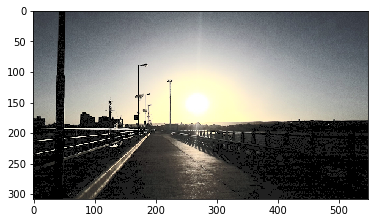

In [68]:
#Nueva Imagen
imsave = img2
cv2.cvtColor(imsave, cv2.COLOR_BGR2RGB, imsave)
cv2.imwrite('newimage.png', img2)
      
#pinta la img nueva
img3=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB, img2)
plt.imshow(img3)
plt.show()

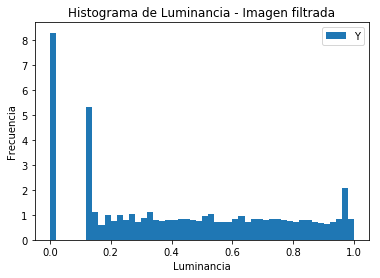

In [70]:
#Histograma imagen  filtrada 
lum = luminancias('img2')                
plt.hist(lum, bins=50, histtype='stepfilled', normed=True, label='Y')
plt.title("Histograma de Luminancia - Imagen filtrada")
plt.xlabel("Luminancia")
plt.ylabel("Frecuencia")
plt.legend()
plt.savefig("hist_newimage.png")
plt.show()